# 투빅스 17기 정규세션 KNN 실습 자료 1

**투빅스 16기 박한나**

### 목차
1. 모듈 및 데이터 불러오기
2. K-Means vs Hierarchical vs DBSCAN 비교
    + Agglomerative Hierarchical Clustering
    + K-Means Clustering
    + DBSCAN

## 1. 모듈 및 데이터 불러오기

### 1.1 모듈 불러오기

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### 1.2 데이터 생성 및 살펴보기

In [ ]:
iris = datasets.load_iris()
df_iris = pd.DataFrame(np.c_[iris['data'], iris['target']], columns=np.append(iris['feature_names'], ['target']))
print(df_iris.shape)
print('target 종류 : ', iris.target_names.tolist())
df_iris.head()

(150, 5)
target 종류 :  ['setosa', 'versicolor', 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [ ]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


[0.0, 1.0, 2.0] :  ['setosa', 'versicolor', 'virginica']
0.0    50
2.0    50
1.0    50
Name: target, dtype: int64


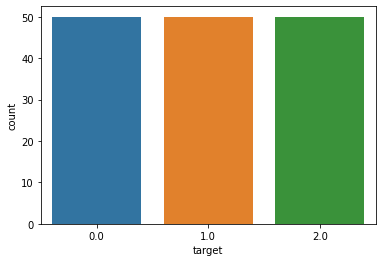

In [ ]:
sns.countplot(df_iris['target'])
print('[0.0, 1.0, 2.0] : ', iris.target_names.tolist())
print(df_iris['target'].value_counts())

In [ ]:
X = df_iris.drop('target', axis=1)
y = df_iris['target']
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## 2. KNN 구현하기

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=12212)
knn = KNeighborsClassifier(5) # n_neighbors = 5 # metric ='euclidean'
knn.fit(x_train, y_train)
print('test score : {:.3f}'.format(knn.score(x_test, y_test)))

test score : 0.974


In [ ]:
results = knn.predict(x_test)
results

array([1., 2., 0., 1., 2., 0., 2., 0., 1., 2., 2., 0., 1., 2., 1., 0., 2.,
       1., 1., 1., 0., 1., 2., 2., 0., 0., 2., 1., 1., 0., 0., 2., 2., 1.,
       2., 0., 2., 2.])

In [ ]:
pd.crosstab(y_test, results, rownames=['Real'], colnames=['Predicted'], margins=True, margins_name='total')

Predicted,0.0,1.0,2.0,total
Real,,,,
0.0,11,0,0,11
1.0,0,12,1,13
2.0,0,0,14,14
total,11,12,15,38


### 평가하기

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,results,target_names=iris.target_names.tolist(), digits=3))

              precision    recall  f1-score   support

      setosa      1.000     1.000     1.000        11
  versicolor      1.000     0.923     0.960        13
   virginica      0.933     1.000     0.966        14

    accuracy                          0.974        38
   macro avg      0.978     0.974     0.975        38
weighted avg      0.975     0.974     0.974        38



### 최적의 K 찾기

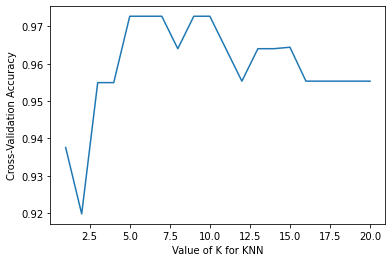

In [ ]:
from sklearn.model_selection import cross_val_score
k_range = list(range(1,21))           # k를 1~100까지 고려하여 최적의 k를 찾을 것이다.
k_score = []                        # 각 k들의 성능을 비교하기 위한 리스트생성이다.

for k in k_range :
    knn = KNeighborsClassifier(k)
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring = "accuracy")    # 10-fold cross-validation
    k_score.append(scores.mean())                    # 10-fold 각각 정확도의 평균으로 성능계산

plt.plot(k_range, k_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validation Accuracy')
plt.show()